# Tutorial

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passagners/airline-passengers.csv


In [2]:
# przetwarzanie danych
import numpy as np
import pandas as pd

# przekształcanie – normalizacja danych
from sklearn.preprocessing import MinMaxScaler

# wizualizacja
import matplotlib.pyplot as plt

# sieci neuronowe
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from keras.layers import GRU

# ewaluacja modelu
from sklearn.metrics import mean_squared_error

In [3]:
dataset = pd.read_csv('/kaggle/input/airline-passagners/airline-passengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
dataset.set_index(['Month'], inplace=True)
dataset

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


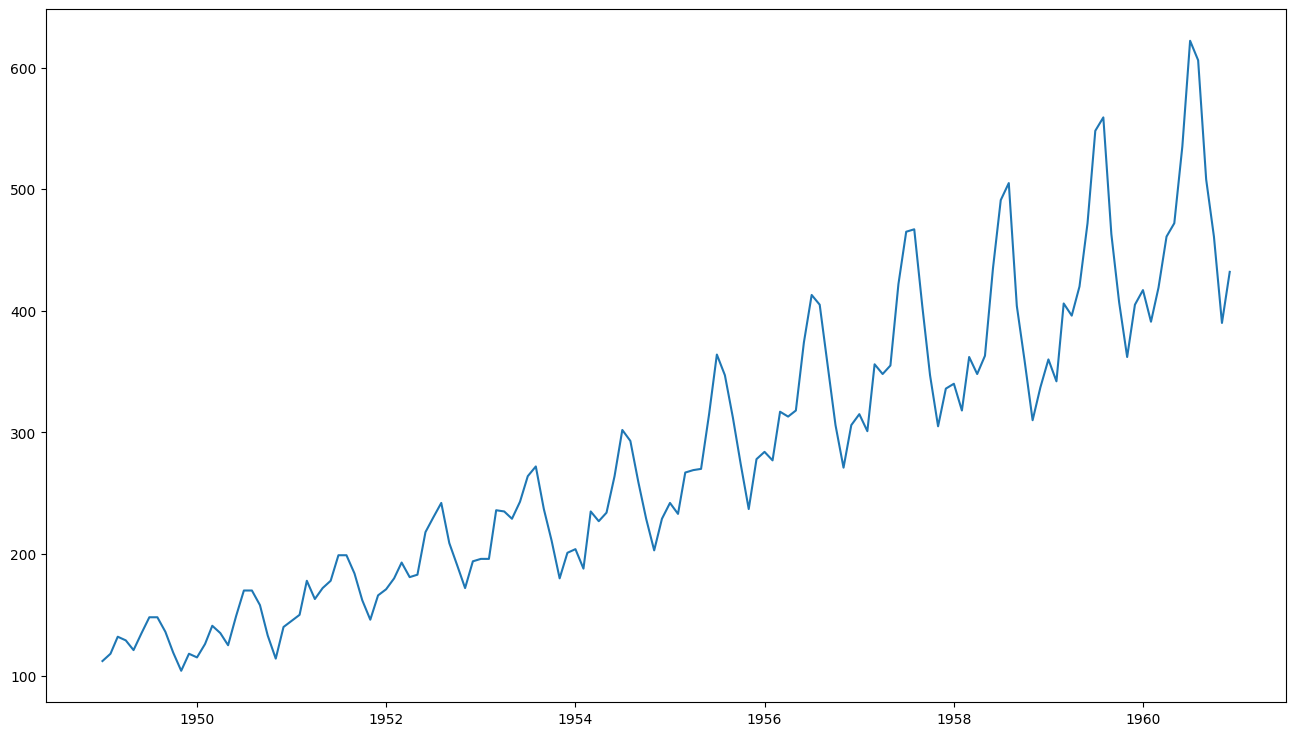

In [6]:
plt.figure(figsize=(16,9))
plt.plot(dataset['Passengers'])
plt.show()

In [26]:
train_size = int(len(dataset) * 0.70)
scaler = MinMaxScaler(feature_range=(0, 1))
look_back = 3
def create_dataset(df, train_size, lback=look_back, scaler_function=scaler):
    test_size = len(df) - train_size
    train, test = df[0:train_size,:].copy(), df[train_size:len(df),:].copy()
    train = scaler_function.fit_transform(train)
    test = scaler_function.transform(test)
    X_train, X_test, y_train, y_test = [], [], [], []

    # Tworzenie zbioru treninowego
    for i in range(len(train)-lback-1):
        a = train[i:(i+lback), 0]
        X_train.append(a)
        y_train.append(train[i + lback, 0])

    # Tworzenie zbioru testowego
    for i in range(len(test)-lback-1):
        a = test[i:(i+lback), 0]
        X_test.append(a)
        y_test.append(test[i + lback, 0])

    X_train, X_test = np.array(X_train), np.array(X_test)
    X_train, X_test = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1])), np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    y_train, y_test = np.array(y_train), np.array(y_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = create_dataset(df=np.array(dataset), train_size=train_size, lback=look_back)

In [8]:
X_train[:3]

array([[[0.02588997, 0.04530744, 0.09061489]],

       [[0.04530744, 0.09061489, 0.08090615]],

       [[0.09061489, 0.08090615, 0.05501618]]])

In [23]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(5, input_shape=(1, look_back)))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

Epoch 1/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3163
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0785
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0483
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0476
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0279
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0137
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119   
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0131
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091   
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082   
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


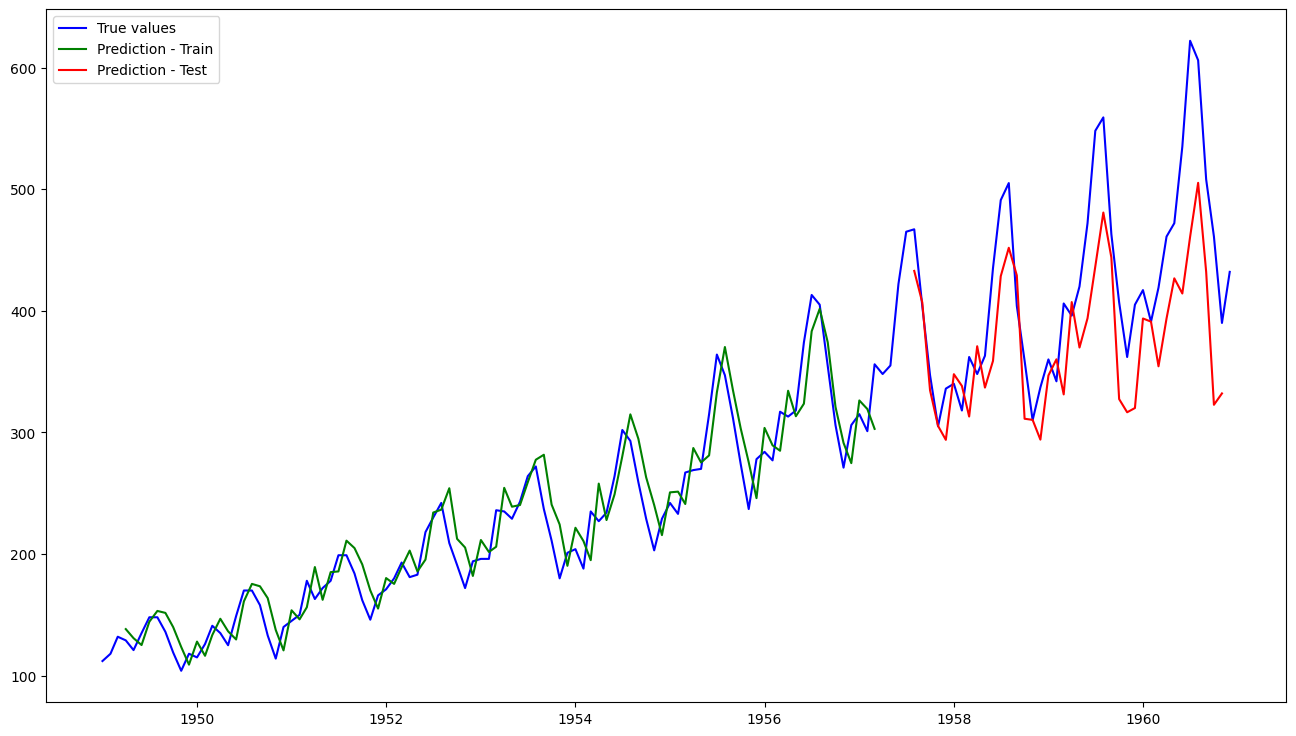


RMSE TEST: 64.07165465273711


In [24]:
def backtests(model, lback=look_back):

    # predykcja - train
    prediction_train = scaler.inverse_transform(model.predict(X_train))
    prediction_train = pd.Series(prediction_train.flatten(),
                                index=dataset.index[lback:len(prediction_train)+lback])

    # predykcja - test
    prediction_test = scaler.inverse_transform(model.predict(X_test))
    prediction_test = pd.Series(prediction_test.flatten(),
                                index=dataset.index[len(prediction_train)+(2*lback)+1:len(dataset)-1])

    # wizualizacja prognozy
    plt.figure(figsize=(16,9))
    plt.plot(dataset['Passengers'], color='blue', label='True values')
    plt.plot(prediction_train, color='green', label='Prediction - Train')
    plt.plot(prediction_test, color='red', label='Prediction - Test')
    plt.legend(loc='upper left')
    plt.show()

    # obliczenie RMSE
    rmse = mean_squared_error(dataset.loc[prediction_test.index, :], prediction_test) ** 0.5
    print(f'\nRMSE TEST: {rmse}')

backtests(model_rnn)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2689
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1087
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0387
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0284
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0182
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0214
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0127
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0105
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 
Epoch 16/200
96

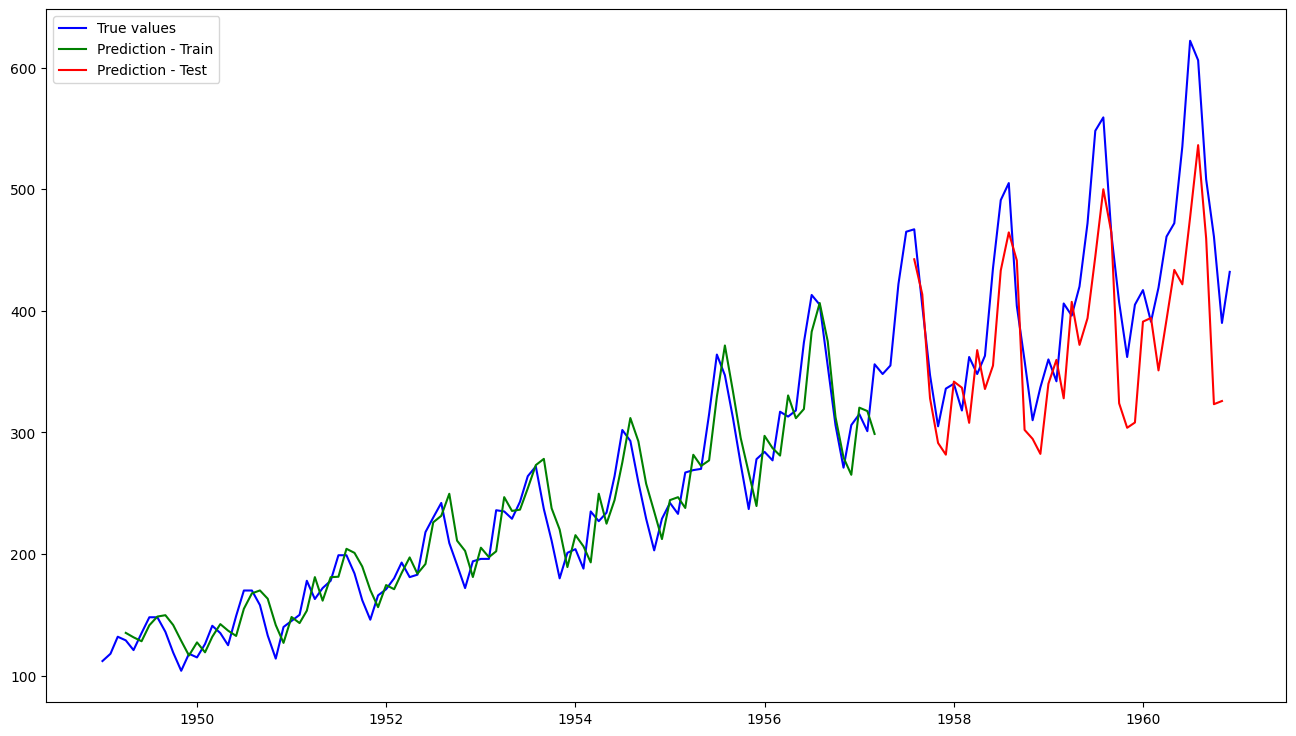


RMSE TEST: 61.801814328531414


In [11]:
model_lstm = Sequential()
model_lstm.add(LSTM(5, input_shape=(1, look_back)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)
backtests(model_lstm)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3037
Epoch 2/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0772
Epoch 3/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0485
Epoch 4/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0502
Epoch 5/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0313
Epoch 6/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0202
Epoch 7/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0249
Epoch 8/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0186
Epoch 9/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171
Epoch 10/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0161
Epoch 11/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220
Epoch 12/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0125
Epoch 13/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113
Epoch 14/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 
Epoch 15/200
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166
Epoch 16/200
96

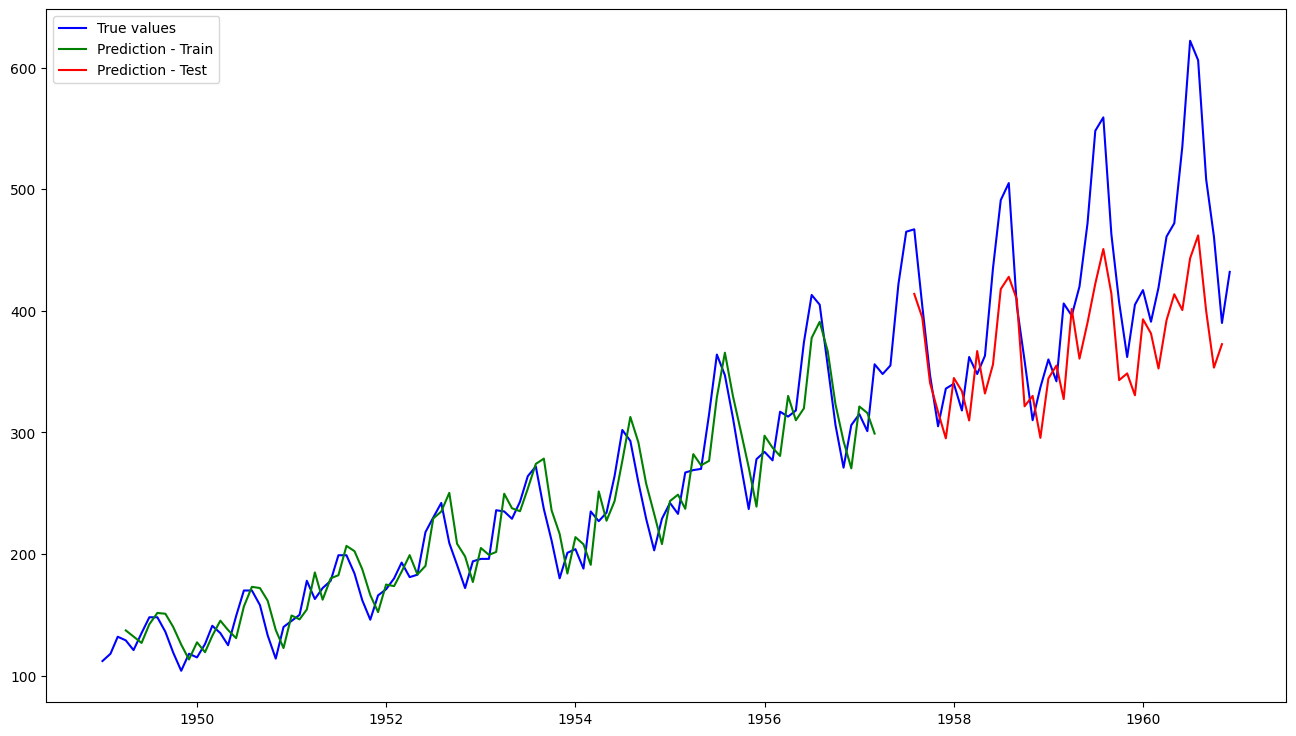


RMSE TEST: 69.71544062149717


In [12]:
model_gru = Sequential()
model_gru.add(GRU(5, input_shape=(1, look_back)))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)
backtests(model_gru)

# Zadanie 19.3

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
import matplotlib.pyplot as plt
import math
import os
import sys
import contextlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Wycisza TF info i warningi
import warnings
warnings.filterwarnings("ignore", message="Do not pass an `input_shape`")  # Wycisza konkretne ostrzeżenie
from tensorflow.keras.callbacks import EarlyStopping


In [5]:
def create_datasets_full(df, look_back, train_size, val_split=0.2):
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(df)

    train_full = df_scaled[:train_size]
    test = df_scaled[train_size:]

    val_size = int(len(train_full) * val_split)
    train = train_full[:-val_size]
    val = train_full[-val_size:]

    def create_xy(data, look_back):
        X, y = [], []
        for i in range(len(data) - look_back):
            X.append(data[i:(i + look_back), 0])
            y.append(data[i + look_back, 0])
        return np.array(X), np.array(y)

    X_train, y_train = create_xy(train, look_back)
    X_val, y_val = create_xy(val, look_back)
    X_test, y_test = create_xy(test, look_back)

    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    return X_train, y_train, X_val, y_val, X_test, y_test, scaler


In [6]:
def grid_search_model_v2(dataset, train_size, model_type):
    best_rmse = float('inf')
    best_model = None
    best_params = {}

    print(f"Start grid search for {model_type} (look_back: 1–6, units: 1–6)")

    for look_back in range(1, 7):
        for units in range(1, 7):
            try:
                X_train, y_train, X_val, y_val, X_test, y_test, scaler = create_datasets_full(dataset, look_back, train_size)

                model = Sequential()
                if model_type == 'LSTM':
                    model.add(LSTM(units, input_shape=(1, look_back)))
                elif model_type == 'GRU':
                    model.add(GRU(units, input_shape=(1, look_back)))
                elif model_type == 'RNN':
                    model.add(SimpleRNN(units, input_shape=(1, look_back)))
                else:
                    raise ValueError("Invalid model type")

                model.add(Dense(1))
                model.compile(loss='mean_squared_error', optimizer='adam')

                early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
                model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=0,
                          validation_data=(X_val, y_val), callbacks=[early_stop])

                val_pred = model.predict(X_val)
                rmse = math.sqrt(mean_squared_error(y_val, val_pred))

                print(f"{model_type} look_back={look_back}, units={units}, RMSE={rmse:.4f}")

                if rmse < best_rmse:
                    best_rmse = rmse
                    best_model = model
                    best_params = {'look_back': look_back, 'units': units}
            except Exception as e:
                print(f"Error at look_back={look_back}, units={units}: {e}")

    print(f"Best {model_type} model: look_back={best_params['look_back']}, units={best_params['units']}, RMSE={best_rmse:.4f}")
    return best_model, best_params


In [7]:
def run_grid_search_on_gpu(dataset, train_size, model_type, gpu_id):
    import tensorflow as tf
    tf.get_logger().setLevel('ERROR')

    with tf.device(f'/GPU:{gpu_id}'):
        model, params = grid_search_model_v2(dataset, train_size, model_type)


In [8]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for i, gpu in enumerate(gpus):
    print(f"GPU {i}: {gpu.name}")

print(f"Liczba dostępnych GPU: {len(gpus)}")


GPU 0: /physical_device:GPU:0
GPU 1: /physical_device:GPU:1
Liczba dostępnych GPU: 2


In [9]:
from threading import Thread

train_size = int(len(dataset) * 0.7)

t1 = Thread(target=run_grid_search_on_gpu, args=(dataset, train_size, 'LSTM', 0))
t2 = Thread(target=run_grid_search_on_gpu, args=(dataset, train_size, 'GRU', 1))

t1.start()
t2.start()

t1.join()
t2.join()

Start grid search for LSTM (look_back: 1–6, units: 1–6)
Start grid search for GRU (look_back: 1–6, units: 1–6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
LSTM look_back=1, units=1, RMSE=0.0667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
GRU look_back=1, units=1, RMSE=0.0623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
GRU look_back=1, units=2, RMSE=0.0641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
LSTM look_back=1, units=2, RMSE=0.0625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
GRU look_back=1, units=3, RMSE=0.0642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
LSTM look_back=1, units=3, RMSE=0.0637
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
GRU look_back=1, units=4, RMSE=0.0641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
LSTM look_back=1, units=4, RMSE=0.0660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
GRU look_back=1, units=5, RMSE=0.0627
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
LSTM look_back=1, units=5, RMSE=0.0645
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
GRU look_back=1, units=6, RMSE=0.0631
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/ste

In [10]:
# Po zakończeniu t1 i t2:
t3 = Thread(target=run_grid_search_on_gpu, args=(dataset, train_size, 'RNN', 1))
t3.start()
t3.join()

Start grid search for RNN (look_back: 1–6, units: 1–6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
RNN look_back=1, units=1, RMSE=0.0651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
RNN look_back=1, units=2, RMSE=0.0635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
RNN look_back=1, units=3, RMSE=0.0626
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
RNN look_back=1, units=4, RMSE=0.0620
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
RNN look_back=1, units=5, RMSE=0.0628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
RNN look_back=1, units=6, RMSE=0.0630
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
RNN look_back=2, units=1, RMSE=0.0839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
RNN look_back=2, units=2, RMSE=0.0599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
RNN look_back=2, units=3, RMSE=0.0581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
RNN look_back=2, units=4, RMSE=0.0590
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
RNN look_back=2, units=5, RMSE=0.0589
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
RNN look_back=2, units=6, RMSE=0.0647
1/1 ━━━━━━━━━━━━━━━━━

In [28]:
# Ustawienia
train_size = int(len(dataset) * 0.70)
scaler = MinMaxScaler(feature_range=(0, 1))
params_lstm = {'look_back': 4, 'units': 6}
params_gru = {'look_back': 4, 'units': 6}
params_rnn = {'look_back': 4, 'units': 6}

# Tworzenie danych z odpowiednim look_back
X_train, X_test, y_train, y_test = create_dataset(
    df=np.array(dataset),
    train_size=train_size,
    lback=params_lstm['look_back'],  # lub params_gru/rnn – wszystkie są równe
    scaler_function=scaler
)

# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(params_lstm['units'], input_shape=(1, params_lstm['look_back'])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

# GRU
model_gru = Sequential()
model_gru.add(GRU(params_gru['units'], input_shape=(1, params_gru['look_back'])))
model_gru.add(Dense(1))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
model_gru.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)

# RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(params_rnn['units'], input_shape=(1, params_rnn['look_back'])))
model_rnn.add(Dense(1))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
model_rnn.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1)


Epoch 1/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1292
Epoch 2/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0480
Epoch 3/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0240
Epoch 4/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0197
Epoch 5/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174
Epoch 6/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164
Epoch 7/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168
Epoch 8/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174
Epoch 9/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130
Epoch 10/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 11/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187
Epoch 12/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122
Epoch 13/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 14/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103
Epoch 15/200
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119
Epo

In [34]:
def plot_model_backtest(model, dataset, train_size, look_back, units, model_name=""):
    # Skalowanie danych
    scaler = MinMaxScaler(feature_range=(0, 1))
    df_scaled = scaler.fit_transform(dataset)
    train = df_scaled[:train_size]
    test = df_scaled[train_size:]

    # Funkcja pomocnicza
    def create_xy(data, look_back):
        X, y = [], []
        for i in range(len(data) - look_back):
            X.append(data[i:i+look_back, 0])
            y.append(data[i + look_back, 0])
        return np.array(X), np.array(y)

    # Tworzenie danych
    X_train, y_train = create_xy(train, look_back)
    X_test, y_test = create_xy(test, look_back)
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

    # Predykcja
    pred_train = scaler.inverse_transform(model.predict(X_train))
    pred_test = scaler.inverse_transform(model.predict(X_test))

    # Indeksy
    train_index = dataset.index[look_back : look_back + len(pred_train)]
    test_index = dataset.index[len(train) + look_back : len(train) + look_back + len(pred_test)]

    # Wykres
    plt.figure(figsize=(16, 9))
    plt.plot(dataset['Passengers'], color='blue', label='True values')
    plt.plot(train_index, pred_train, color='green', label='Prediction - Train')
    plt.plot(test_index, pred_test, color='red', label='Prediction - Test')
    plt.title(f'{model_name} (look_back={look_back}, units={units})')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


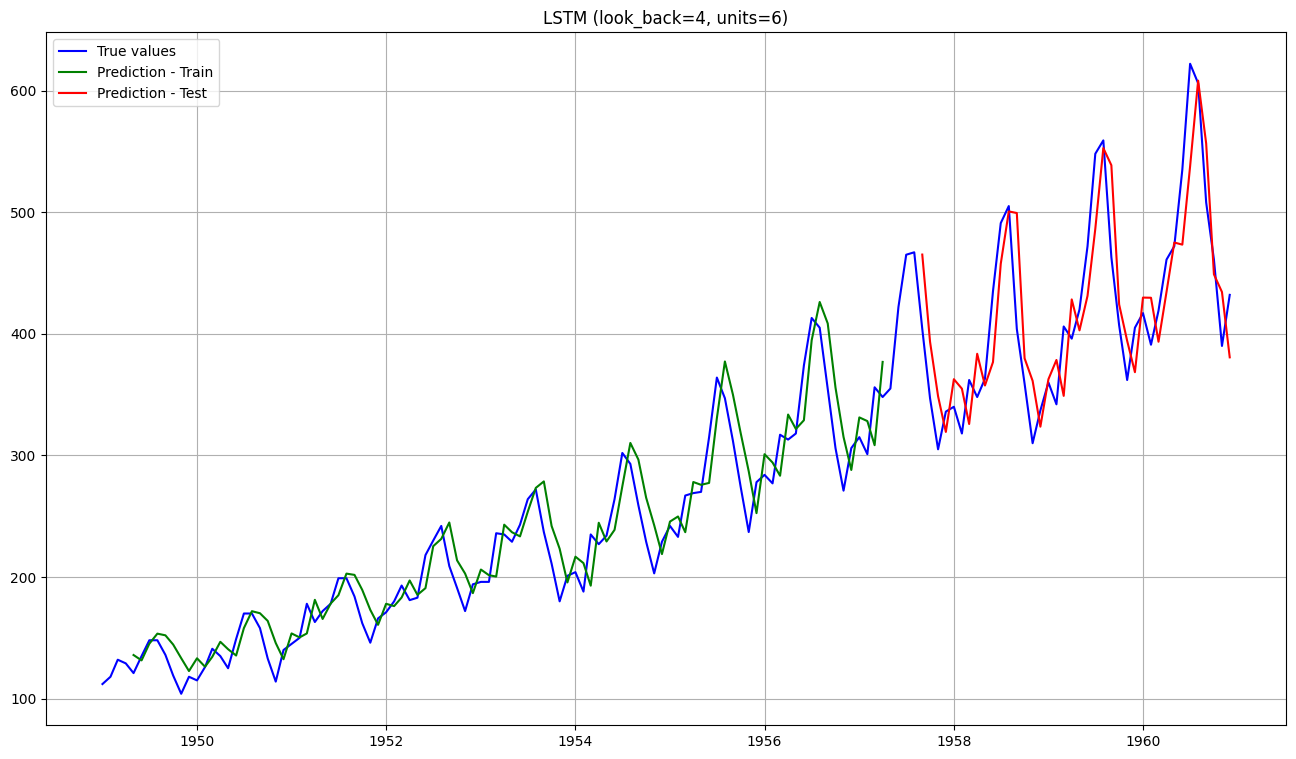

In [35]:
plot_model_backtest(model_lstm, dataset, train_size, look_back=4, units=6, model_name="LSTM")



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


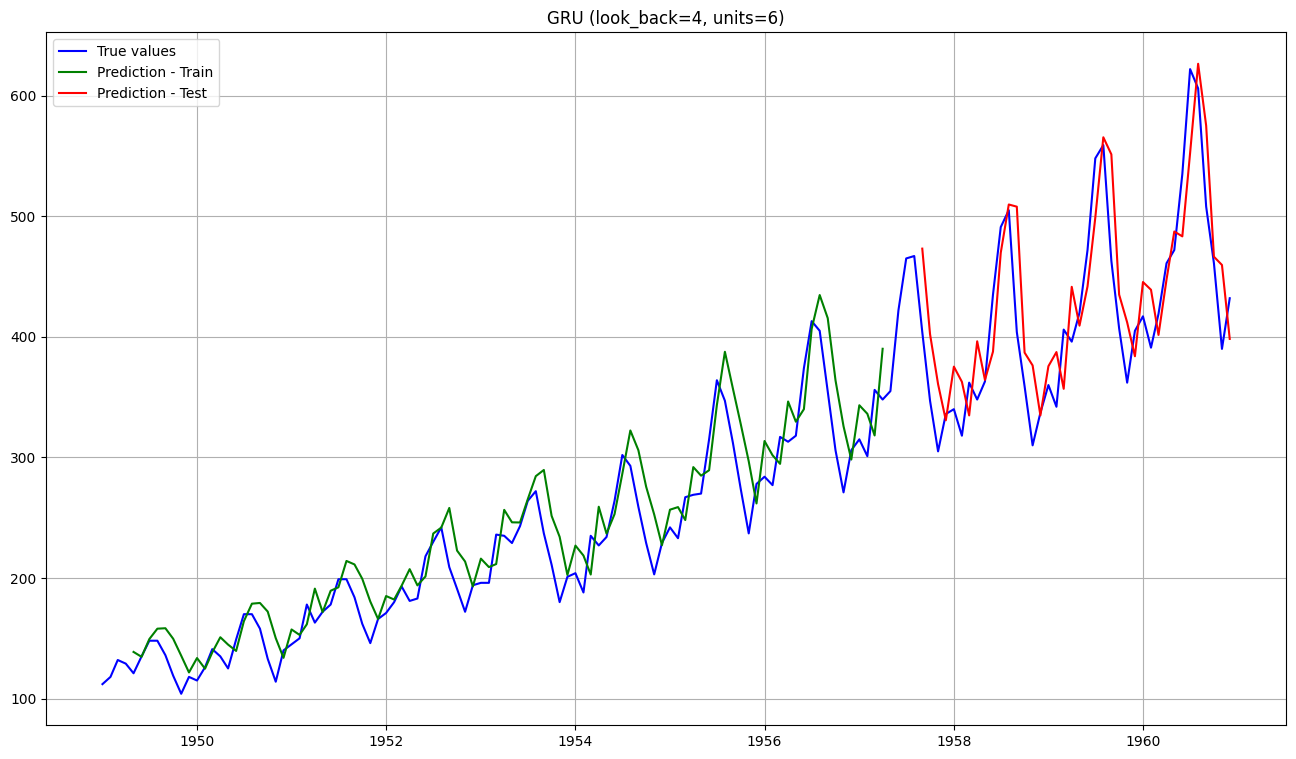

In [36]:
plot_model_backtest(model_gru, dataset, train_size, look_back=4, units=6, model_name="GRU")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


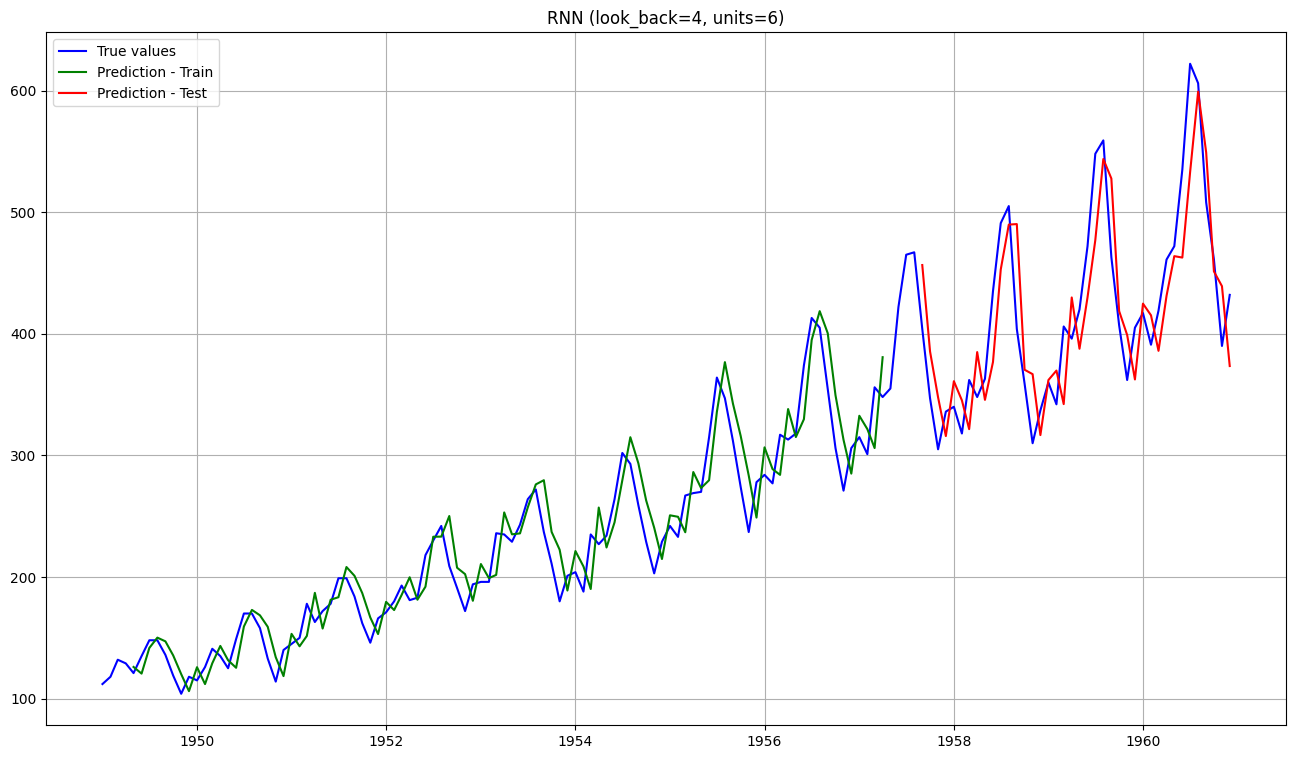

In [37]:
plot_model_backtest(model_rnn, dataset, train_size, look_back=4, units=6, model_name="RNN")